### This notebook focus on data preparation to prepare data to be a modeling dataste. I will conduct simple EDA to understand the ratings over each version of Honkai: Star Rail and general opinion on this game. 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
sns.set_style("darkgrid")

## Data Preparation

#### This is a sentimental analysis project and an supervisied learning task. The label is the rating column and the feature is the snippet (Review) column.

#### Encode postive if rating is equal to and above 4; otherwise, encode negative.

#### Remove id, title, avatar, and iso_date

#### keep rating, snippet, likes, date, and response.

#### Even though this project is a sentimental analysis,  likes, date, and response feature may be a good for EDA to discover some inisghts from the game.


### Read CSV

In [3]:
df = pd.read_csv("Honkai-Star_Rail.csv")

In [4]:
df.head()

,id,title,avatar,rating,snippet,likes,date,iso_date,response
0,643cc314-5ec6-47c7-b721-329f6d5f74a0,Elnaz Jahed,https://play-lh.googleusercontent.com/a-/ALV-U...,4.0,The combat is turn-based which is not my favor...,448,"June 19, 2024",2024-06-19T12:54:28Z,NaN
1,7c17c69b-abe6-4571-b4a9-d2175646d4f3,Carlos Vargas,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,The constant grind for materials to activate c...,49,"July 05, 2024",2024-07-05T07:14:29Z,NaN
2,27d2bdca-a653-4914-90bd-aa56dcaac4dd,samantha,https://play-lh.googleusercontent.com/a-/ALV-U...,5.0,I love this game so much. The only mobile game...,144,"July 12, 2024",2024-07-12T02:53:45Z,NaN
3,7a684049-22da-4ace-b0da-53d4c19a3dbc,Lillian McCall-Bush,https://play-lh.googleusercontent.com/a-/ALV-U...,4.0,I love this game. It has amazing story and cha...,64,"June 30, 2024",2024-06-30T19:29:01Z,NaN
4,0de8422c-87d1-461e-bcea-7f7e5bfba373,Wesley Li,https://play-lh.googleusercontent.com/a-/ALV-U...,5.0,Decent game overall. Beautiful character and m...,427,"June 18, 2024",2024-06-18T19:00:33Z,NaN


### Drop features

In [5]:
df = df.drop(["id", "title", "avatar", "iso_date"], axis=1)

In [6]:
df.head()

,rating,snippet,likes,date,response
0,4.0,The combat is turn-based which is not my favor...,448,"June 19, 2024",NaN
1,3.0,The constant grind for materials to activate c...,49,"July 05, 2024",NaN
2,5.0,I love this game so much. The only mobile game...,144,"July 12, 2024",NaN
3,4.0,I love this game. It has amazing story and cha...,64,"June 30, 2024",NaN
4,5.0,Decent game overall. Beautiful character and m...,427,"June 18, 2024",NaN


### Dimension and Data Type

In [7]:
print("Number of observations: {}".format(df.shape))

Number of observations: (19900, 5)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19900 entries, 0 to 19899
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    19900 non-null  float64
 1   snippet   19900 non-null  object 
 2   likes     19900 non-null  int64  
 3   date      19900 non-null  object 
 4   response  960 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 777.5+ KB
None


### Check missing values

In [9]:
df.isnull().sum()

rating          0
snippet         0
likes           0
date            0
response    18940
dtype: int64

### Convert date's data type to datetime object

In [10]:
date_format = "%B %d, %Y"
new_date = [datetime.strptime(date_string, date_format) for date_string in df.date]

df["new_date"] = new_date

In [11]:
df.head()

,rating,snippet,likes,date,response,new_date
0,4.0,The combat is turn-based which is not my favor...,448,"June 19, 2024",NaN,2024-06-19
1,3.0,The constant grind for materials to activate c...,49,"July 05, 2024",NaN,2024-07-05
2,5.0,I love this game so much. The only mobile game...,144,"July 12, 2024",NaN,2024-07-12
3,4.0,I love this game. It has amazing story and cha...,64,"June 30, 2024",NaN,2024-06-30
4,5.0,Decent game overall. Beautiful character and m...,427,"June 18, 2024",NaN,2024-06-18


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19900 entries, 0 to 19899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   rating    19900 non-null  float64       
 1   snippet   19900 non-null  object        
 2   likes     19900 non-null  int64         
 3   date      19900 non-null  object        
 4   response  960 non-null    object        
 5   new_date  19900 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 932.9+ KB


### Map the ratings to positive or negative 

In [37]:
# change rating's data type to integer
df["rating"] = df.rating.astype(int)

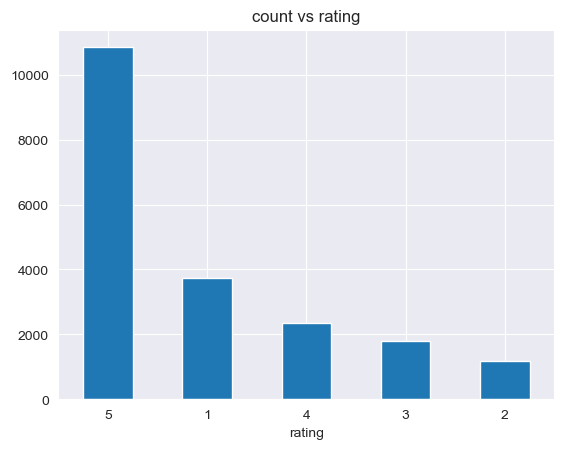

In [66]:
# show the number of observation for each class
df["rating"].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0) 
plt.title("count vs rating")
plt.show()

#### The highest rating is 5 and the lowest rating is 2

#### Many players rate Honkai: Star Rail 5 stars 

In [15]:
# if the rating is euqal to or above 4 Positive; otherwise Negative
new_rating = ["Positive" if rating >= 4 else "Negative" for rating in df.rating]

In [16]:
df["new_rating"] = new_rating

In [17]:
df.head()

,rating,snippet,likes,date,response,new_date,new_rating
0,4,The combat is turn-based which is not my favor...,448,"June 19, 2024",NaN,2024-06-19,Positive
1,3,The constant grind for materials to activate c...,49,"July 05, 2024",NaN,2024-07-05,Negative
2,5,I love this game so much. The only mobile game...,144,"July 12, 2024",NaN,2024-07-12,Positive
3,4,I love this game. It has amazing story and cha...,64,"June 30, 2024",NaN,2024-06-30,Positive
4,5,Decent game overall. Beautiful character and m...,427,"June 18, 2024",NaN,2024-06-18,Positive


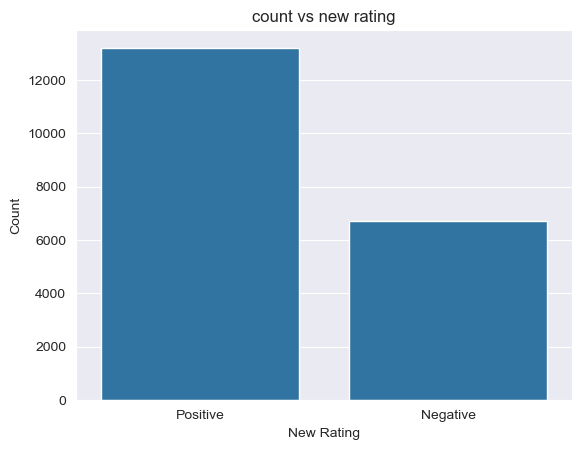

In [18]:
# show the number of observations of Positive and Negative
sns.barplot(df.new_rating.value_counts())
plt.xlabel("New Rating")
plt.ylabel("Count")
plt.title("count vs new rating")
plt.show()

#### After econding the rating label, the plot shows that the Positive rating is more than Negative rating 

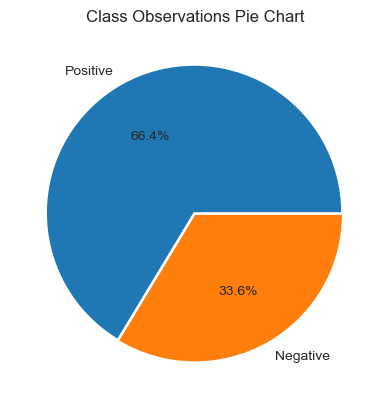

In [67]:
plt.pie(
    df.new_rating.value_counts() / np.sum(df.new_rating.value_counts()),
    labels=["Positive", "Negative"],
    autopct='%1.1f%%',
    explode=[0.01, 0]
    )
plt.title("Class Observations Pie Chart")
plt.show()

#### Look into the ratio of two classes in the rating label, the Positive class is 66.4% and the Ngeative class is 33.6% in the overall number of class observations

#### This is a class imbalance issue and may lead to a bias model, but the main idea here is to undertsand what things players have complainted about the game.

## Date of Reviews

In [76]:
print("The most recent review: {}".format(max(df["new_date"])))
print("The oldest review: {}".format(min(df["new_date"])))

The most recent review: 2024-08-01 00:00:00
The oldest review: 2023-04-23 00:00:00


#### The reviews I scraped are between 2023-04-23 and 2024-08-01.

#### Among the time period, Honkai: Star Rail released totally 12 versions: 1.0, 1.1, ....., 2.3, 2.4

#### Each version released date: https://honkai-star-rail.fandom.com/wiki/Version

## Create a game_version column: which version did each player comment on 

In [93]:
# create a copy of the dataframe
df2 = df.copy()

# create the corresponding bins
date_bins = ["2023-04-22", "2023-06-06", "2023-07-18", "2023-08-29", 
     "2023-10-10", "2023-11-14", "2023-12-26", "2024-02-05", 
     "2024-03-26", "2024-05-07", "2024-06-18", "2024-07-30", "2024-8-01"]

# create the corresponding labels
version_labels = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
                  2.0, 2.1, 2.2, 2.3, 2.4]

# transform the bins to datetime object
date_bins = pd.to_datetime(date_bins)

# create the feature according to the bins and labels
    # The game version between 2023-04-22 and 2023-06-06 is 1.0, 
    # However, 2023-04-22 is not included in the interval
    # version > 2023-04-22 and version <= 2023-06-06 maps to 1.0 version
df2["game_version"] = pd.cut(
  df2["new_date"],
    bins=date_bins,
    labels=version_labels
)

In [94]:
df2.head()

,rating,snippet,likes,date,response,new_date,new_rating,game_version
0,4,The combat is turn-based which is not my favor...,448,"June 19, 2024",NaN,2024-06-19,Positive,2.3
1,3,The constant grind for materials to activate c...,49,"July 05, 2024",NaN,2024-07-05,Negative,2.3
2,5,I love this game so much. The only mobile game...,144,"July 12, 2024",NaN,2024-07-12,Positive,2.3
3,4,I love this game. It has amazing story and cha...,64,"June 30, 2024",NaN,2024-06-30,Positive,2.3
4,5,Decent game overall. Beautiful character and m...,427,"June 18, 2024",NaN,2024-06-18,Positive,2.2


In [102]:
# chekcing if this is a correct result
df2[(df2["new_date"] < "2024-07-31") & (df2["new_date"] >= "2024-06-19")].head()

,rating,snippet,likes,date,response,new_date,new_rating,game_version
0,4,The combat is turn-based which is not my favor...,448,"June 19, 2024",NaN,2024-06-19,Positive,2.3
1,3,The constant grind for materials to activate c...,49,"July 05, 2024",NaN,2024-07-05,Negative,2.3
2,5,I love this game so much. The only mobile game...,144,"July 12, 2024",NaN,2024-07-12,Positive,2.3
3,4,I love this game. It has amazing story and cha...,64,"June 30, 2024",NaN,2024-06-30,Positive,2.3
5,4,Fantastic game! The story is immaculate and I ...,65,"June 30, 2024",NaN,2024-06-30,Positive,2.3


## EDA on Rating 

In [150]:
# use groupby() to obtain the number of ratings, average rating, median, and standard deviation from each version, 
rating_stats = df2.groupby("game_version", observed=True)["rating"].agg(["count", "mean", "median", "std"])

In [161]:
print(rating_stats)

              count      mean  median       std
game_version                                   
1.0            5989  3.704291     5.0  1.594041
1.1            1727  3.674001     4.0  1.559827
1.2            1437  3.659708     4.0  1.588301
1.3            1024  3.692383     5.0  1.591799
1.4             692  3.817919     5.0  1.568069
1.5            1080  4.180556     5.0  1.395010
1.6            1150  4.172174     5.0  1.402444
2.0            2157  3.781641     5.0  1.604746
2.1            1765  3.878754     5.0  1.547079
2.2            1639  3.899939     5.0  1.565343
2.3            1238  3.386107     4.0  1.739140
2.4               2  1.000000     1.0  0.000000


#### The 2.4 version just released few days ago, so there are not many reviews have made on this version. 

#### Decide to remove the 2.4 version reviews from the dataset

In [162]:
rating_stats = rating_stats.iloc[:-1, :]
rating_stats

,count,mean,median,std
game_version,,,,
1.0,5989,3.704291,5.0,1.594041
1.1,1727,3.674001,4.0,1.559827
1.2,1437,3.659708,4.0,1.588301
1.3,1024,3.692383,5.0,1.591799
1.4,692,3.817919,5.0,1.568069
1.5,1080,4.180556,5.0,1.395010
1.6,1150,4.172174,5.0,1.402444
2.0,2157,3.781641,5.0,1.604746
2.1,1765,3.878754,5.0,1.547079


#### The line plot shows that the first version (1.0) hit the max number of reviews. Then, the number of reviews of the game kept decreasing until 1.4 version. Finally, it started decreasing again.

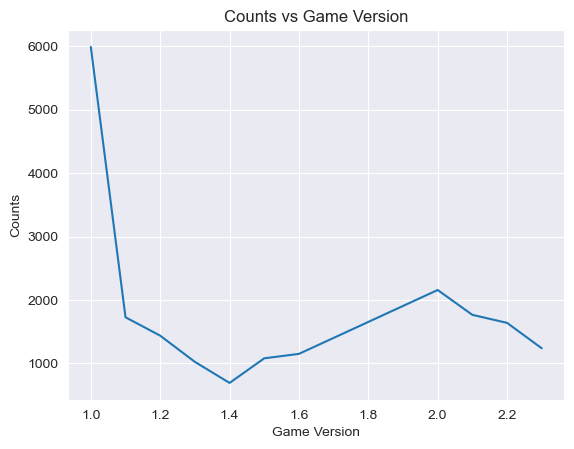

In [167]:
sns.lineplot(x=list(rating_stats.index), 
             y=rating_stats["count"])
plt.xlabel("Game Version")
plt.ylabel("Counts")
plt.title("Counts vs Game Version")
plt.show()

#### The line plot shows that average and median rating score over each version. We can see that the median rating score have not been lower than 4 across all the version.

#### However, the mean rating score is always below the median rating score. This indicates that the rating score distribution of each version skews to left

#### Many players would rate Honkai: Star Rail 3 stars, 2 stars, or 1 star even though majority palyers think Honkai: Star Rail deserve 5 stars

#### One more interesting thing is that the average rating score line is opposite to the number of reviews line above. 

#### As the the number of reviews decreases, the average rating score increases. As the number of reviews increases, the average rating score decreases. This scenario have started at 1.2 version.

#### When a Honkai: Star Rail's new version released, more reviews makes a lower rating score because the players start to complaint about the game

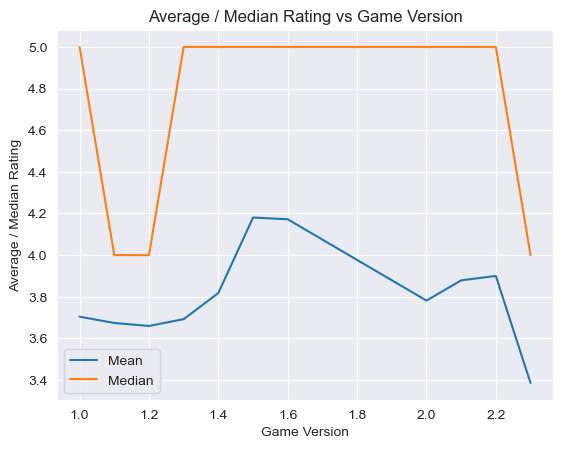

In [175]:
sns.lineplot(x=list(rating_stats.index), 
             y=rating_stats["mean"], label="Mean")

sns.lineplot(x=list(rating_stats.index), 
             y=rating_stats["median"], label="Median")

plt.xlabel("Game Version")
plt.ylabel("Average / Median Rating")
plt.title("Average / Median Rating vs Game Version")
plt.show()

#### The histogram plot shows the rating score distribution from game verson 1.0 to 2.3. The median rating score is above the average rating score.

In [185]:
average_rating = np.mean(df2["rating"])
median_rating = np.median(df2["rating"])

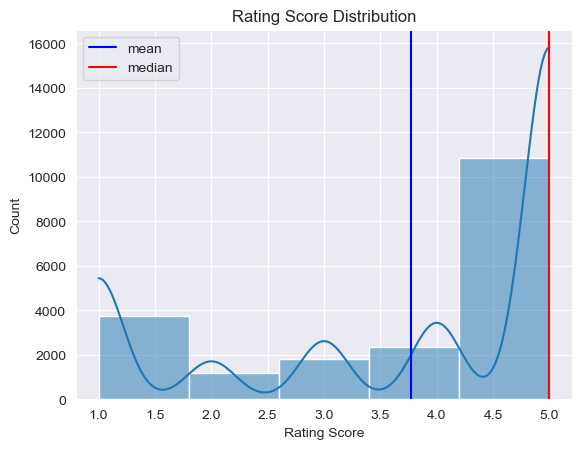

In [197]:
sns.histplot(df2["rating"], bins=5, kde=True)
plt.axvline(average_rating, color="blue", label="mean")
plt.axvline(median_rating, color="red", label="median")
plt.legend()
plt.title("Rating Score Distribution")
plt.xlabel("Rating Score")
plt.show()

#### The bar plot below demonstrate my opinion above because the positive rating is always higher than the negative review over each version

In [173]:
rating_counts = df2.groupby("game_version", observed=True)["new_rating"].value_counts().unstack()
rating_counts = rating_counts.iloc[:-1, :]

In [176]:
rating_counts

new_rating,Negative,Positive
game_version,,
1.0,2151.0,3838.0
1.1,655.0,1072.0
1.2,537.0,900.0
1.3,370.0,654.0
1.4,219.0,473.0
1.5,238.0,842.0
1.6,258.0,892.0
2.0,720.0,1437.0
2.1,528.0,1237.0


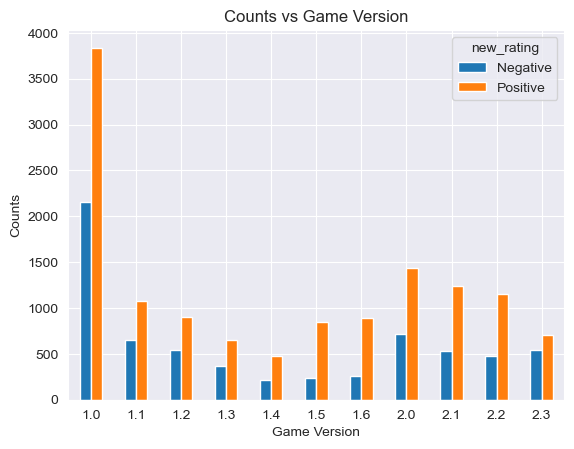

In [174]:
rating_counts.plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Game Version")
plt.ylabel("Counts")
plt.title("Counts vs Game Version")
plt.show()

## Save the data frame to a csv file

In [200]:
df2.head()

,rating,snippet,likes,date,response,new_date,new_rating,game_version
0,4,The combat is turn-based which is not my favor...,448,"June 19, 2024",NaN,2024-06-19,Positive,2.3
1,3,The constant grind for materials to activate c...,49,"July 05, 2024",NaN,2024-07-05,Negative,2.3
2,5,I love this game so much. The only mobile game...,144,"July 12, 2024",NaN,2024-07-12,Positive,2.3
3,4,I love this game. It has amazing story and cha...,64,"June 30, 2024",NaN,2024-06-30,Positive,2.3
4,5,Decent game overall. Beautiful character and m...,427,"June 18, 2024",NaN,2024-06-18,Positive,2.2


In [203]:
df2 = df2.loc[:, ["date", "new_date", "game_version", "snippet", "likes", "response", "rating", "new_rating"]]

In [204]:
df2.head()

,date,new_date,game_version,snippet,likes,response,rating,new_rating
0,"June 19, 2024",2024-06-19,2.3,The combat is turn-based which is not my favor...,448,NaN,4,Positive
1,"July 05, 2024",2024-07-05,2.3,The constant grind for materials to activate c...,49,NaN,3,Negative
2,"July 12, 2024",2024-07-12,2.3,I love this game so much. The only mobile game...,144,NaN,5,Positive
3,"June 30, 2024",2024-06-30,2.3,I love this game. It has amazing story and cha...,64,NaN,4,Positive
4,"June 18, 2024",2024-06-18,2.2,Decent game overall. Beautiful character and m...,427,NaN,5,Positive


#### df3 is a modified dataset which is good for EDA or other tasks 

In [205]:
df3 = df2.drop("date", axis=1)

In [209]:
df3.head()

,new_date,game_version,snippet,likes,response,rating,new_rating
0,2024-06-19,2.3,The combat is turn-based which is not my favor...,448,NaN,4,Positive
1,2024-07-05,2.3,The constant grind for materials to activate c...,49,NaN,3,Negative
2,2024-07-12,2.3,I love this game so much. The only mobile game...,144,NaN,5,Positive
3,2024-06-30,2.3,I love this game. It has amazing story and cha...,64,NaN,4,Positive
4,2024-06-18,2.2,Decent game overall. Beautiful character and m...,427,NaN,5,Positive


In [214]:
df3 = df3.rename(columns={
    "new_date":"date",
    "new_rating":"positive_rating"})

In [215]:
df3.head()

,date,game_version,snippet,likes,response,rating,positive_rating
0,2024-06-19,2.3,The combat is turn-based which is not my favor...,448,NaN,4,Positive
1,2024-07-05,2.3,The constant grind for materials to activate c...,49,NaN,3,Negative
2,2024-07-12,2.3,I love this game so much. The only mobile game...,144,NaN,5,Positive
3,2024-06-30,2.3,I love this game. It has amazing story and cha...,64,NaN,4,Positive
4,2024-06-18,2.2,Decent game overall. Beautiful character and m...,427,NaN,5,Positive


#### df4 is a modeling dataset which only keep the snippet and the positive_rating column

In [216]:
df4 = df3[["snippet", "positive_rating"]]

In [217]:
df4.head()

,snippet,positive_rating
0,The combat is turn-based which is not my favor...,Positive
1,The constant grind for materials to activate c...,Negative
2,I love this game so much. The only mobile game...,Positive
3,I love this game. It has amazing story and cha...,Positive
4,Decent game overall. Beautiful character and m...,Positive


In [219]:
# save df3 and df4 to csv
df3.to_csv("Honkai-Star-Rail-EDA.csv", index=False)
df4.to_csv("Honkai-Star-Rail-modeling.csv", index=False)